# The main purpose of this code is to perform a machine learning task for classifying news articles into two categories: real news and fake news. It achieves this by following these steps:

## 1. Data Preprocessing:
   - The code reads a dataset named 'liar.csv' and applies text preprocessing techniques. This includes converting text to lowercase, removing non-alphabetic characters, stemming, and removing stopwords.

## 2. Feature Extraction:
   - It uses the CountVectorizer to convert the processed text data into a numerical format known as the "bag of words" representation. This is crucial for training machine learning models on text data.

## 3. Model Training and Evaluation:
   - The code trains several machine learning models, including Multinomial Naive Bayes, Gaussian Naive Bayes, AdaBoost, Decision Tree, Logistic Regression, Random Forest, SVM, and Perceptron, to classify the news articles. For each model, it provides a classification report and a confusion matrix to evaluate its performance.


### IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn import metrics
import itertools
from sklearn.metrics import classification_report

### DATA EXPLORATION

In [2]:
df = pd.read_csv('liar.csv')


In [3]:
print(df.shape)
print(df['label'].unique())
df.head()

(10240, 14)
['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


,id,label,statement,subject,speaker,job,state,party,barely-true,false,half-true,mostly-true,pants-fire,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
df.dropna()
df = df[~df['label'].isin(['barely-true', 'half-true'])].replace({ 'false' : 1, 'true' : 0, 'pants-fire' : 1, 'mostly-true' : 0})
df

,id,label,statement,subject,speaker,job,state,party,barely-true,false,half-true,mostly-true,pants-fire,venue
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
2,324.json,0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
5,12465.json,0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
9,9741.json,0,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,4388.json,1,Mayor Fung wants to punish our childrens educa...,"children,city-budget,deficit,education,state-b...",richard-tomlins,NaN,Rhode Island,democrat,0.0,0.0,0.0,0.0,1.0,a recorded telephone message to Cranston resid...
10235,5473.json,0,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,0,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10238,2253.json,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [5]:
X = df.drop(["subject", "speaker", "job", "state", "party", "barely-true", "false", "half-true", "mostly-true", "pants-fire", "venue"], axis=1)

In [6]:
y = df['label']

In [7]:
from sklearn.utils.multiclass import unique_labels
unique_labels(df['label'])

array([0, 1], dtype=int64)

In [8]:
df['label'].value_counts(normalize=True)

0    0.562114
1    0.437886
Name: label, dtype: float64

In [9]:
X

,id,label,statement
0,2635.json,1,Says the Annies List political group supports ...
2,324.json,0,"Hillary Clinton agrees with John McCain ""by vo..."
3,1123.json,1,Health care reform legislation is likely to ma...
5,12465.json,0,The Chicago Bears have had more starting quart...
9,9741.json,0,Says GOP primary opponents Glenn Grothman and ...
...,...,...,...
10233,4388.json,1,Mayor Fung wants to punish our childrens educa...
10235,5473.json,0,There are a larger number of shark attacks in ...
10236,3408.json,0,Democrats have now become the party of the [At...
10238,2253.json,1,On lifting the U.S. Cuban embargo and allowing...


In [10]:
messages = X.copy()
messages.reset_index(inplace=True)

In [11]:
# messages['index'][4]

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # rimozione della desinenza delle parole
import re
ps = PorterStemmer()
corpus = []                                # definisco il corpus come una lista vuota
for i in range(0, len(messages)):          # ciclo con il quale applico le seguenti operazioni
    review = re.sub('[^a-zA-Z]', ' ', messages['statement'][i]) # match all strings that contain a non-letter
    review = review.lower() # tutto minuscolo
    review = review.split() # delimitatore tra tweet, ovvero una virgola
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]   # rimozione della desinenza delle parole
    review = ' '.join(review)
    corpus.append(review)   # il corpus diventa una lista composta dalla variabile "review"

In [13]:
corpus[0:10]

['say anni list polit group support third trimest abort demand',
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran',
 'health care reform legisl like mandat free sex chang surgeri',
 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad',
 'say gop primari oppon glenn grothman joe leibham cast compromis vote cost million higher electr cost',
 'first time histori share nation popular vote margin smaller latino vote margin',
 'mitt romney governor massachusett didnt slow rate growth govern actual cut',
 'economi bled billion due govern shutdown',
 'mccain oppos requir govern buy american made motorcycl said buy american provis quot disgrac',
 'almost peopl left puerto rico last year']

# FEATURE EXTRACTION (BAG OF WORDS)


In [14]:
# CounterVectorizer
# bag of words
cv = CountVectorizer(max_features=5000,ngram_range=(1,3)) # Convert a collection of text documents to a matrix of token counts.
X = cv.fit_transform(corpus).toarray()

In [15]:
# show resulting vocabulary
# the numbers are the position in the sparse vector
cv.vocabulary_

{'say': 3727,
 'list': 2368,
 'polit': 3196,
 'group': 1768,
 'support': 4310,
 'third': 4458,
 'abort': 9,
 'demand': 1020,
 'hillari': 1899,
 'clinton': 690,
 'agre': 88,
 'john': 2158,
 'mccain': 2511,
 'vote': 4713,
 'give': 1669,
 'georg': 1646,
 'bush': 483,
 'benefit': 343,
 'iran': 2076,
 'hillari clinton': 1900,
 'john mccain': 2161,
 'mccain vote': 2515,
 'vote give': 4729,
 'georg bush': 1649,
 'john mccain vote': 2163,
 'health': 1828,
 'care': 554,
 'reform': 3487,
 'legisl': 2320,
 'like': 2358,
 'mandat': 2451,
 'free': 1583,
 'sex': 3979,
 'chang': 624,
 'surgeri': 4328,
 'health care': 1829,
 'care reform': 569,
 'health care reform': 1837,
 'chicago': 637,
 'bear': 323,
 'start': 4166,
 'last': 2269,
 'year': 4947,
 'total': 4526,
 'number': 2801,
 'tenur': 4428,
 'uw': 4665,
 'faculti': 1389,
 'fire': 1480,
 'two': 4611,
 'decad': 988,
 'last year': 2284,
 'last two': 2281,
 'two decad': 4613,
 'gop': 1698,
 'primari': 3288,
 'oppon': 2925,
 'glenn': 1673,
 'joe': 21

In [16]:
y = messages['label']

In [17]:
from sklearn.utils.multiclass import unique_labels
unique_labels(messages['label'])

array([0, 1], dtype=int64)

# WORDCLOUD GENERATION (Real News)

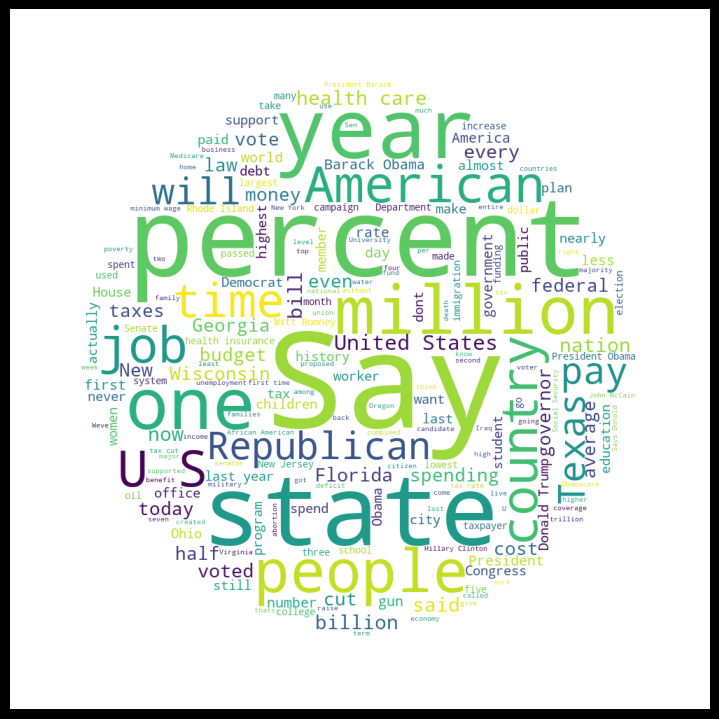

In [18]:
asse_x, asse_y = np.ogrid[:1000, :1000]

real = ' '.join(list(messages[messages['label']==0]['statement']))
mask = (asse_x - 500) ** 2 + (asse_y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)
real = WordCloud(width=512, height=512, background_color='white', mask=mask).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# WORDCLOUD GENERATION (Fake News)

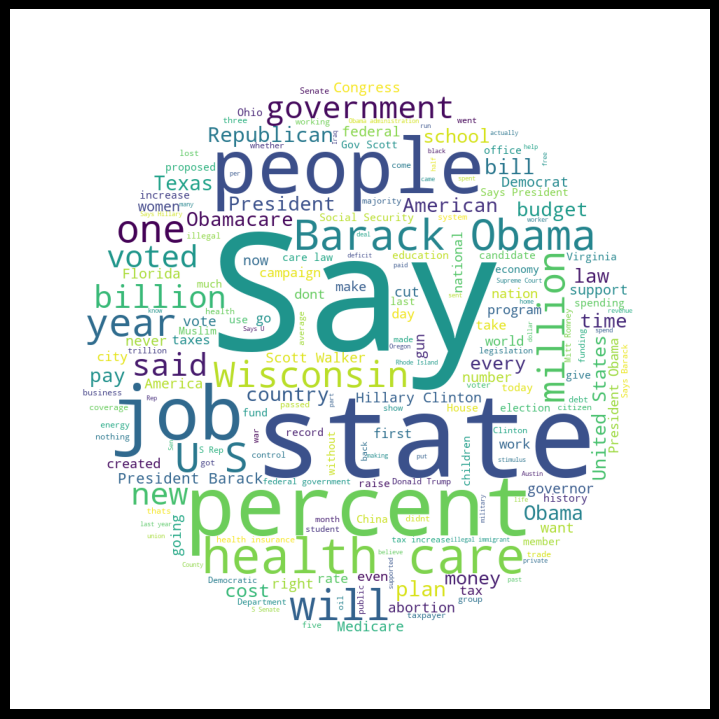

In [19]:
asse_x, asse_y = np.ogrid[:1000, :1000]

fake = ' '.join(list(messages[messages['label']==1]['statement']))
mask = (asse_x - 500) ** 2 + (asse_y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)
fake = WordCloud(width=512, height=512, background_color='white', mask=mask).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# MODEL TRAINING

In [20]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
cv.get_feature_names_out()[:500] # prime 500 parole del dizionario

array(['abandon', 'abbott', 'abc', 'abel', 'abid', 'abil', 'abl',
       'abl bodi', 'abolish', 'abort', 'abraham', 'abraham lincoln',
       'absolut', 'abus', 'academi', 'accept', 'access', 'accid',
       'accident', 'accommod', 'accomplish', 'accord', 'accord recent',
       'account', 'account offic', 'account percent', 'accus', 'achiev',
       'aclu', 'acorn', 'acquir', 'acr', 'across', 'across board',
       'across countri', 'across ohio', 'across state', 'act', 'act law',
       'act would', 'action', 'action immigr', 'activ', 'activist',
       'actual', 'actual turn', 'ad', 'ad job', 'ad trillion',
       'ad trillion debt', 'adam', 'add', 'add trillion', 'addict',
       'addit', 'address', 'adjust', 'administr', 'admiss', 'admit',
       'adopt', 'adult', 'advanc', 'advantag', 'advertis', 'advis',
       'advisor', 'advisori', 'advisori board', 'advoc', 'affair',
       'affect', 'affili', 'afford', 'afford care', 'afford care act',
       'afghanistan', 'africa', 'africa

In [22]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [23]:
count_df.head(100)

,abandon,abbott,abc,abel,abid,abil,abl,abl bodi,abolish,abort,...,young,young adult,young peopl,your,youth,youv,youv got,zero,zero job,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# CONFUSION MATRIX

In [24]:
# This function prints and plots the confusion matrix.
# source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# Normalization can be applied by setting `normalize=True`.

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

# Multinomial Naive Bayes Algorithm

In [43]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB() # inserisco il classificatore Multinomiale dentro la variabile classifier

classifier.fit(X_train, y_train) 

mnb_pred = classifier.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, mnb_pred, digits=3, target_names = labels))


              precision    recall  f1-score   support

notizie vere      0.687     0.685     0.686      1115
   fake news      0.577     0.579     0.578       827

    accuracy                          0.640      1942
   macro avg      0.632     0.632     0.632      1942
weighted avg      0.640     0.640     0.640      1942



accuracy:   0.640
Confusion matrix


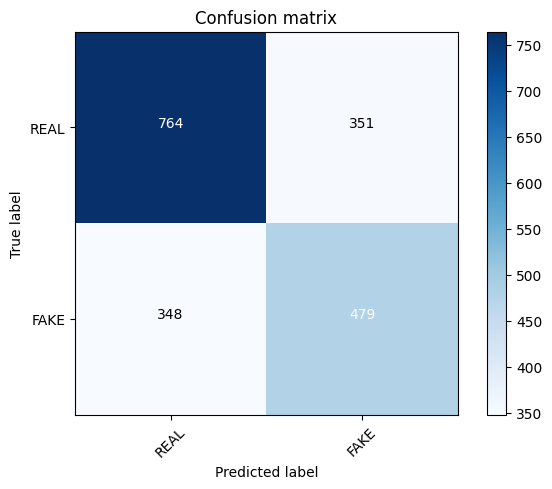

In [44]:
score = metrics.accuracy_score(y_test, mnb_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, mnb_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, gnb_pred, digits=3, target_names = labels))

              precision    recall  f1-score   support

notizie vere      0.669     0.417     0.514      1115
   fake news      0.479     0.722     0.576       827

    accuracy                          0.547      1942
   macro avg      0.574     0.569     0.545      1942
weighted avg      0.588     0.547     0.540      1942



accuracy:   0.547
Confusion matrix


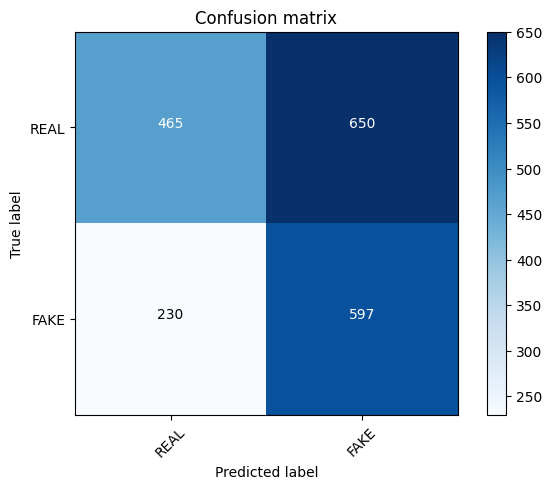

In [46]:
score = metrics.accuracy_score(y_test, gnb_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, gnb_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# AdaBoost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier= AdaBoostClassifier()

ada_classifier.fit(X_train, y_train)

ada_pred = ada_classifier.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, ada_pred, digits=3, target_names = labels))


              precision    recall  f1-score   support

notizie vere      0.625     0.874     0.729      1115
   fake news      0.633     0.294     0.401       827

    accuracy                          0.627      1942
   macro avg      0.629     0.584     0.565      1942
weighted avg      0.628     0.627     0.589      1942



accuracy:   0.627
Confusion matrix


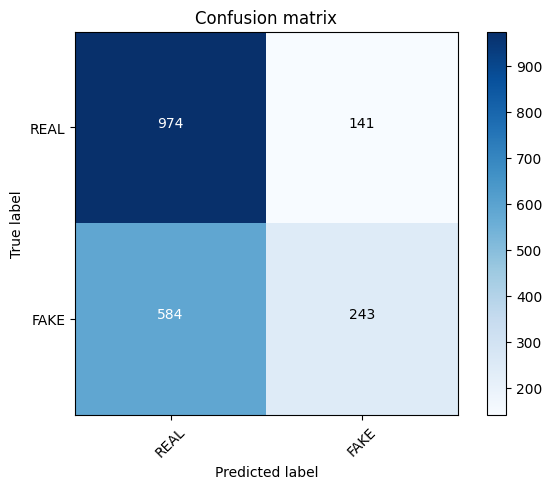

In [48]:
score = metrics.accuracy_score(y_test, ada_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, ada_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# DecisionTree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, dt_pred, digits=3, target_names = labels))

              precision    recall  f1-score   support

notizie vere      0.591     0.939     0.725      1115
   fake news      0.600     0.123     0.205       827

    accuracy                          0.592      1942
   macro avg      0.595     0.531     0.465      1942
weighted avg      0.595     0.592     0.504      1942



accuracy:   0.592
Confusion matrix


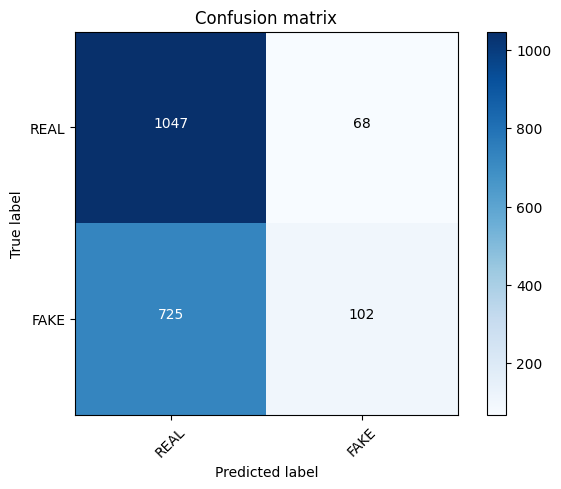

In [50]:
score = metrics.accuracy_score(y_test, dt_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, dt_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()

log_classifier.fit(X_train, y_train) # Train the model using the training sets (X, y)  # Addestro il modello

log_pred = log_classifier.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, log_pred, digits=3, target_names = labels))


              precision    recall  f1-score   support

notizie vere      0.671     0.684     0.678      1115
   fake news      0.563     0.548     0.555       827

    accuracy                          0.626      1942
   macro avg      0.617     0.616     0.616      1942
weighted avg      0.625     0.626     0.625      1942



accuracy:   0.626
Confusion matrix


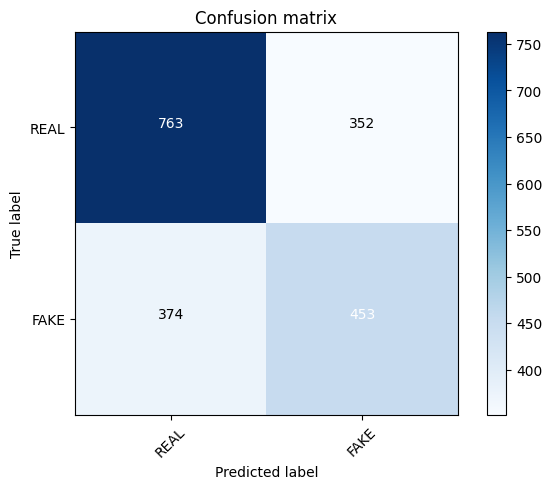

In [52]:
score = metrics.accuracy_score(y_test, log_pred)

# print("log predictions:", log_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, log_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# RandomForest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, rf_pred, digits=3, target_names = labels))


              precision    recall  f1-score   support

notizie vere      0.683     0.730     0.706      1115
   fake news      0.599     0.543     0.569       827

    accuracy                          0.650      1942
   macro avg      0.641     0.636     0.638      1942
weighted avg      0.647     0.650     0.648      1942



accuracy:   0.650
Confusion matrix


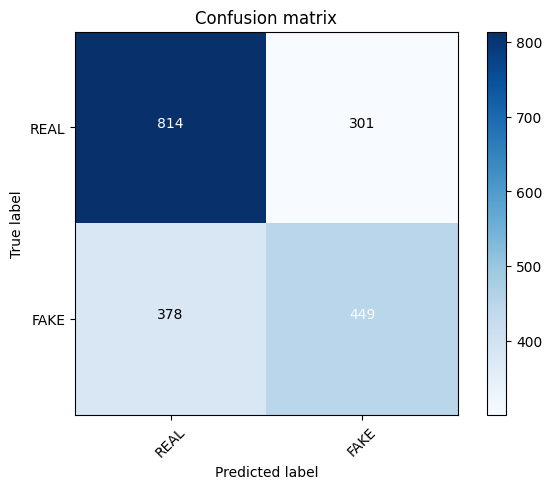

In [54]:
score = metrics.accuracy_score(y_test, rf_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, rf_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# SVM

In [55]:
from sklearn.svm import SVC

svclassifier = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)

svclassifier.fit(X_train, y_train) # Train the model using the training sets (X, y)  # Addestro il modello

svm_pred = svclassifier.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, svm_pred, digits=3, target_names = labels))

accuracy:   0.597
Confusion matrix


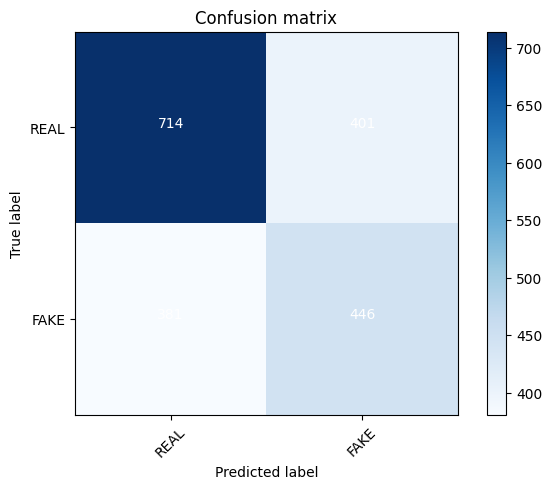

In [ ]:
# print(svm_pred) # aggiunto

score = metrics.accuracy_score(y_test, svm_pred)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, svm_pred)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

Perceptron_classifier = Perceptron()

Perceptron_classifier.fit(X_train, y_train) # Train the model using the training sets (X, y)  # Addestro il modello

Tper_Predictions = Perceptron_classifier.predict(X_test)

labels = ['notizie vere', 'fake news']

print(classification_report(y_test, Tper_Predictions, digits=3, target_names = labels))


              precision    recall  f1-score   support

notizie vere      0.652     0.599     0.624      1115
   fake news      0.513     0.568     0.539       827

    accuracy                          0.586      1942
   macro avg      0.582     0.584     0.582      1942
weighted avg      0.592     0.586     0.588      1942



accuracy:   0.586
Confusion matrix


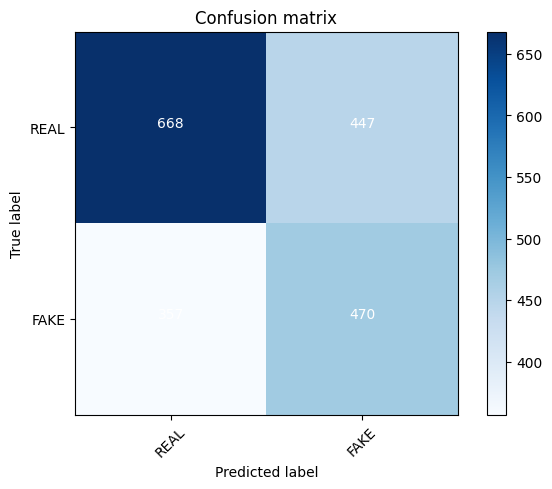

In [ ]:
score = metrics.accuracy_score(y_test, Tper_Predictions)

print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, Tper_Predictions)

plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])

# 20 MOST FREQUENT WORDS BARPLOT

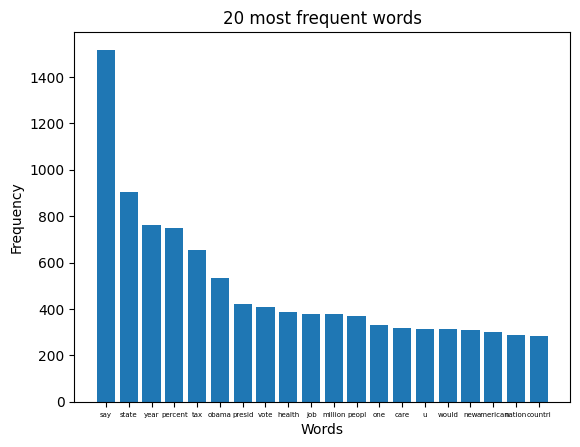

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

description_list = corpus

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(description_list).split()).most_common(20)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("20 most frequent words")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.show()


In [ ]:
description_list = corpus

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(description_list).split()).most_common(20)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

print('Termine\t\tOccorrenze')
for words, counts in word_frequency:
    print('{}\t--\t{}'.format(words, counts))

Termine		Occorrenze
say	--	1517
state	--	902
year	--	763
percent	--	750
tax	--	654
obama	--	533
presid	--	420
vote	--	407
health	--	386
job	--	380
million	--	376
peopl	--	369
one	--	329
care	--	318
u	--	314
would	--	313
new	--	307
american	--	301
nation	--	288
countri	--	282
